# Preparación
Se monta el sistema de archivos de google drive.


In [65]:
import tensorflow as tf
tf.test.gpu_device_name()

2022-01-07 13:17:26.567962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:17:26.568752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:17:26.569208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:17:26.569819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:17:26.570366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

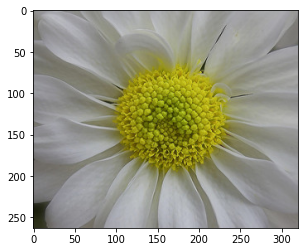

In [66]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('../input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg', 'r')
imshow(np.asarray(pil_im))



# Carga del dataset

In [67]:
image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/flowers-recognition/flowers",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/flowers-recognition/flowers",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


# Modelo

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten, BatchNormalization

In [69]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights=None, include_top=True, classes = 5)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),
              metrics=['accuracy'])

# Visualización del modelo

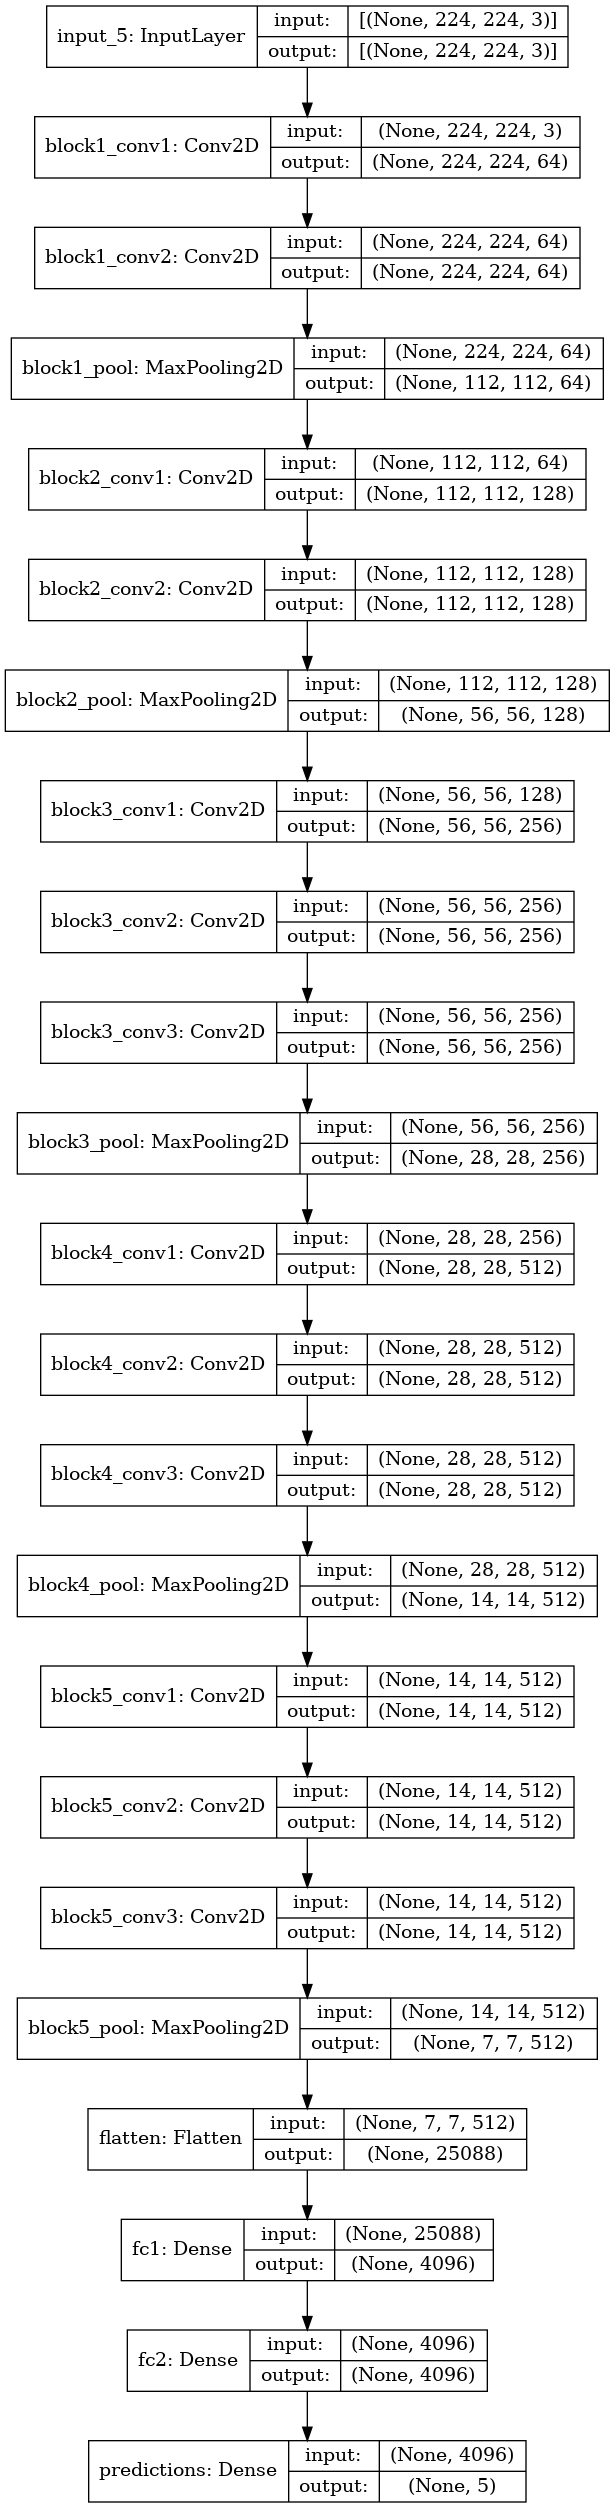

In [70]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True)

# Entrenamiento

In [71]:
from keras.callbacks import EarlyStopping

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15,
                   restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
108/108 [==============================] - 27s 237ms/step - loss: 1.5071 - accuracy: 0.3156 - val_loss: 1.3627 - val_accuracy: 0.4345
Epoch 2/200
108/108 [==============================] - 26s 235ms/step - loss: 1.2879 - accuracy: 0.4572 - val_loss: 1.1974 - val_accuracy: 0.5087
Epoch 3/200
108/108 [==============================] - 26s 235ms/step - loss: 1.1471 - accuracy: 0.5310 - val_loss: 1.1054 - val_accuracy: 0.5852
Epoch 4/200
108/108 [==============================] - 26s 234ms/step - loss: 1.0544 - accuracy: 0.5724 - val_loss: 1.0808 - val_accuracy: 0.5910
Epoch 5/200
108/108 [==============================] - 26s 234ms/step - loss: 0.9996 - accuracy: 0.6008 - val_loss: 1.1416 - val_accuracy: 0.5353
Epoch 6/200
108/108 [==============================] - 26s 235ms/step - loss: 0.9504 - accuracy: 0.6233 - val_loss: 1.0815 - val_accuracy: 0.6083
Epoch 7/200
108/108 [==============================] - 26s 234ms/step - loss: 0.9063 - accuracy: 0.6401 - val_loss: 1.0239 -

# Gráfica de evolución de pérdida y exactitud durante el entrenamiento

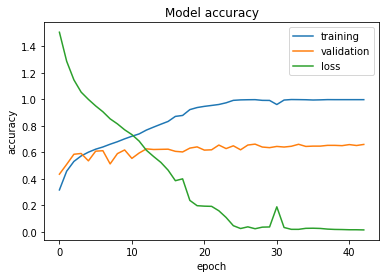

In [72]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

# Evaluación de los resultados

              precision    recall  f1-score   support

           0     0.5766    0.6423    0.6077       123
           1     0.7564    0.7195    0.7375       246
           2     0.6225    0.5663    0.5931       166
           3     0.7600    0.7125    0.7355       160
           4     0.5602    0.6369    0.5961       168

    accuracy                         0.6616       863
   macro avg     0.6552    0.6555    0.6540       863
weighted avg     0.6675    0.6616    0.6633       863



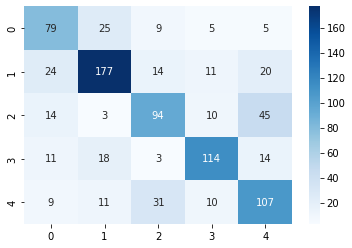

In [73]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [74]:
img = keras.preprocessing.image.load_img(
    '../input/flowers-recognition/flowers/daisy/10172636503_21bededa75_n.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(np.argmax(predictions[0]))

2
